/Users/sky/Library/Python/3.9/lib/python/site-packages/MITRotor/TipLoss.py:56: RuntimeWarning: divide by zero encountered in divide
  rotor.N_blades / 2 * (1 - geometry.mu_mesh) / (np.maximum(geometry.mu_mesh, 0.0001) * np.abs(np.sin(phi)))
/Users/sky/Library/Python/3.9/lib/python/site-packages/MITRotor/TipLoss.py:62: RuntimeWarning: divide by zero encountered in divide
  rotor.N_blades
/Users/sky/Library/Python/3.9/lib/python/site-packages/UnifiedMomentumModel/Momentum.py:184: RuntimeWarning: divide by zero encountered in divide
  np.cos(yaw)
/Users/sky/Library/Python/3.9/lib/python/site-packages/UnifiedMomentumModel/Momentum.py:195: RuntimeWarning: invalid value encountered in divide
  -dp / (0.5 * Ctprime * np.cos(yaw) ** 2)
/Users/sky/Library/Python/3.9/lib/python/site-packages/UnifiedMomentumModel/Momentum.py:196: RuntimeWarning: invalid value encountered in divide
  + (1 - u4**2 - v4**2) / (Ctprime * np.cos(yaw) ** 2)
/Users/sky/Library/Python/3.9/lib/python/site-packages/Unified

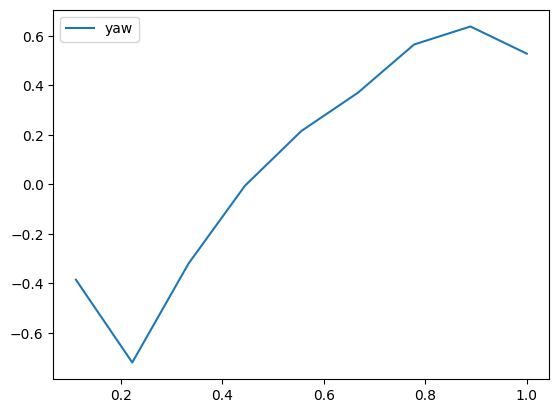

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from MITRotor import BEM, IEA15MW, UnifiedMomentum, IEA15MW


# Initialize rotor using the IEA10MW reference wind turbine model.
rotor = IEA15MW()
bem = BEM(rotor=rotor, momentum_model=UnifiedMomentum(averaging="sector"))

# solve BEM for a control set point.
pitch, tsr, misalignment = np.deg2rad(0), 7.0, np.deg2rad(30.0)
yaw_sol = bem(pitch, tsr, misalignment, 0)
tilt_sol = bem(pitch, tsr, 0, misalignment)

idx = 5
mu_mesh = yaw_sol.geom.mu_mesh[:, idx]
theta_mesh = yaw_sol.geom.theta_mesh[:, idx]
Cax_yaw = yaw_sol.Cax(grid = "sector")[:, idx]
# Cax_tilt = tilt_sol.a(grid = "sector")[idx, :]

plt.plot(mu_mesh, Cax_yaw, label = "yaw")
# plt.plot(theta_mesh, Cax_tilt, label = "tilt")
plt.legend()